Digitizer opened: 268435456
Digitizer name: M3102A
slot: 7
Chassis: 1

AWG opened:  268435457
AWG name:  M3202A
Slot:  3
Chassis:  1

Single Gaussian pulse sent successfully

AOU closed
AIN closed


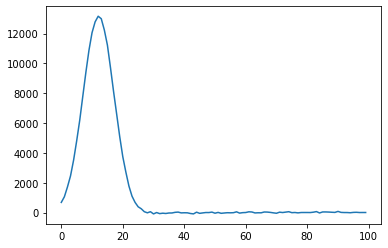

In [1]:
# AWG AND DIGITIZER COMBINED
import sys
sys.path.append('C:\Program Files\Keysight\SD1\Libraries\Python')
import keysightSD1
import matplotlib.pyplot as plt

# Digitizer Control
# MODULE CONSTANTS
PRODUCT = "M3102A"
CHASSIS = 1
SLOT = 7
CHANNEL = 4
# CREATE AND OPEN MODULE
DIG = keysightSD1.SD_AIN()
moduleID = DIG.openWithSlot(PRODUCT, CHASSIS, SLOT)
if moduleID < 0:
    print("Module open error:", moduleID)
else:
    print("Digitizer opened:", moduleID)
    print("Digitizer name:", DIG.getProductName())
    print("slot:", DIG.getSlot())
    print("Chassis:", DIG.getChassis())
    print()
    # CONFIGURE AND START DAQ
    POINTS_PER_CYCLE = 100
    CYCLES = 1
    TRIGGER_DELAY = 0
    DIG.channelTriggerConfig(CHANNEL, 3, .005)
    DIG.DAQconfig(CHANNEL, POINTS_PER_CYCLE, CYCLES, TRIGGER_DELAY, 3)
    DIG.DAQstart(CHANNEL)
  

 # AWG Control 
 # MODULE CONSTANTS
PRODUCT = "M3202A"
CHASSIS = 1
SLOT = 3
CHANNEL = 4
AMPLITUDE = .1 

# CREATE AND OPEN MODULE
AWG = keysightSD1.SD_AOU()
moduleID = AWG.openWithSlot(PRODUCT, CHASSIS, SLOT)
if moduleID < 0:
    print("Module open error: ", moduleID)
else:
    print("AWG opened: ", moduleID)
    print("AWG name: ", AWG.getProductName())
    print("Slot: ", AWG.getSlot())
    print("Chassis: ", AWG.getChassis())
    print()
    AWG.channelWaveShape(CHANNEL, keysightSD1.SD_Waveshapes.AOU_AWG)
    AWG.channelAmplitude(CHANNEL, AMPLITUDE)
    
    # WAVEFORM FROM FILE
    WAVE_NUMBER = 0
    # create, open from file, load to module RAM and queue for execution
    wave = keysightSD1.SD_Wave()
    # set path to your file here
    wave.newFromFile("C:/Users/Public/Documents/keysightSD1/Examples/Waveforms/Gaussian.csv")
    AWG.waveformLoad(wave, WAVE_NUMBER)
    AWG.AWGqueueWaveform(CHANNEL, WAVE_NUMBER, 0, 0, 1, 0)
    
    error = AWG.AWGstart(CHANNEL)
    if error < 0:
        print("AWG from file error: ", error)
    else: 
        print("Single Gaussian pulse sent successfully")
    AWG.AWGflush(CHANNEL)
    AWG.AWGstop(CHANNEL)
    AWG.close()
    print()
    print("AOU closed")
    
  # READ DATA
TIMEOUT = 1
dataRead = DIG.DAQread(CHANNEL, POINTS_PER_CYCLE * CYCLES, TIMEOUT)
DIG.close()
print("AIN closed")

plt.plot(dataRead)
plt.show()

Digitizer opened: 268435456
Digitizer name: M3102A
slot: 7
Chassis: 1

AWG opened:  268435457
AWG name:  M3202A
Slot:  3
Chassis:  1

Gaussian pulse and Triangle sent successfully

AOU closed
AIN closed


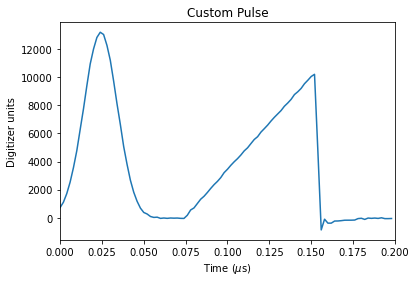

In [6]:
# FULL PULSE FOLLOWED BY TRIANGLE
import numpy as np

# Digitizer Control
# MODULE CONSTANTS
PRODUCT = "M3102A"
CHASSIS = 1
SLOT = 7
CHANNEL = 4
# CREATE AND OPEN MODULE
DIG = keysightSD1.SD_AIN()
moduleID = DIG.openWithSlot(PRODUCT, CHASSIS, SLOT)
if moduleID < 0:
    print("Module open error:", moduleID)
else:
    print("Digitizer opened:", moduleID)
    print("Digitizer name:", DIG.getProductName())
    print("slot:", DIG.getSlot())
    print("Chassis:", DIG.getChassis())
    print()
    # CONFIGURE AND START DAQ
    POINTS_PER_CYCLE = 100
    CYCLES = 1
    TRIGGER_DELAY = 0
    DIG.channelTriggerConfig(CHANNEL, 3, .005)
    DIG.DAQconfig(CHANNEL, POINTS_PER_CYCLE, CYCLES, TRIGGER_DELAY, 3)
    DIG.DAQstart(CHANNEL)
  

 # AWG Control 
 # MODULE CONSTANTS
PRODUCT = "M3202A"
CHASSIS = 1
SLOT = 3
CHANNEL = 4
AMPLITUDE = .1 

# CREATE AND OPEN MODULE
AWG = keysightSD1.SD_AOU()
moduleID = AWG.openWithSlot(PRODUCT, CHASSIS, SLOT)
if moduleID < 0:
    print("Module open error: ", moduleID)
else:
    print("AWG opened: ", moduleID)
    print("AWG name: ", AWG.getProductName())
    print("Slot: ", AWG.getSlot())
    print("Chassis: ", AWG.getChassis())
    print()
    AWG.channelWaveShape(CHANNEL, keysightSD1.SD_Waveshapes.AOU_AWG)
    AWG.channelAmplitude(CHANNEL, AMPLITUDE)
    
    # WAVEFORM FROM FILE
    WAVE_NUMBER = 0
    # create, open from file, load to module RAM and queue for execution
    wave = keysightSD1.SD_Wave()
    # set path to your file here
    wave.newFromFile("C:/Users/Public/Documents/keysightSD1/Examples/Waveforms/Gaussian.csv")
    AWG.waveformLoad(wave, WAVE_NUMBER)
    AWG.AWGqueueWaveform(CHANNEL, WAVE_NUMBER, 0, 0, 1, 0)
    
    # WAVEFORM FROM ARRAY
    TRIANGLE = np.linspace(0,.8,80)
    WAVE_NUMBER += 1
    wave.newFromArrayDouble(0,TRIANGLE)
    AWG.waveformLoad(wave, WAVE_NUMBER)
    AWG.AWGqueueWaveform(CHANNEL, WAVE_NUMBER, 0, 0, 1, 0)

    
    error = AWG.AWGstart(CHANNEL)
    if error < 0:
        print("AWG from file error: ", error)
    else: 
        print("Gaussian pulse and Triangle sent successfully")
    AWG.AWGflush(CHANNEL)
    AWG.AWGstop(CHANNEL)
    AWG.close()
    print()
    print("AOU closed")
    
  # READ DATA
TIMEOUT = 1
dataRead = DIG.DAQread(CHANNEL, POINTS_PER_CYCLE * CYCLES, TIMEOUT)
freq = DIG.clockGetFrequency()
DIG.close()
print("AIN closed")

time = np.arange(0, POINTS_PER_CYCLE*CYCLES/freq, 1/freq) * 1e6 # microseconds
plt.plot(time, dataRead)
plt.xlim(0,POINTS_PER_CYCLE*CYCLES/freq*1e6)
plt.xlabel("Time ($\mu$s)")
plt.ylabel("Digitizer units")
plt.title("Custom Pulse")
plt.show()

In [26]:
print(freq)

500000000.0


Digitizer opened: 268435456
Digitizer name: M3102A
slot: 7
Chassis: 1

AIN closed


ValueError: x and y must have same first dimension, but have shapes (1000,) and (0,)

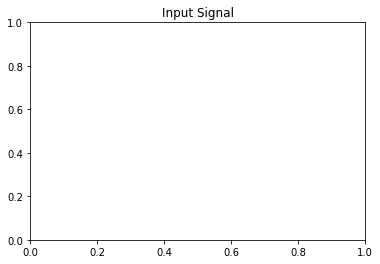

In [5]:
# FFT PRACTICE
import sys
sys.path.append('C:\Program Files\Keysight\SD1\Libraries\Python')
import keysightSD1
import matplotlib.pyplot as plt
import numpy as np

# Digitizer Control
# MODULE CONSTANTS
PRODUCT = "M3102A"
CHASSIS = 1
SLOT = 7
CHANNEL = 4
# CREATE AND OPEN MODULE
DIG = keysightSD1.SD_AIN()
moduleID = DIG.openWithSlot(PRODUCT, CHASSIS, SLOT)
if moduleID < 0:
    print("Module open error:", moduleID)
else:
    print("Digitizer opened:", moduleID)
    print("Digitizer name:", DIG.getProductName())
    print("slot:", DIG.getSlot())
    print("Chassis:", DIG.getChassis())
    print()
    # CONFIGURE AND START DAQ
    POINTS_PER_CYCLE = 1000
    CYCLES = 1
    TRIGGER_DELAY = 0
    FULL_SCALE = .25
    IMPEDANCE = 1 # 50 ohm
    COUPLING = 1  # AC
    DIG.channelTriggerConfig(CHANNEL, 3, .005)
    DIG.DAQconfig(CHANNEL, POINTS_PER_CYCLE, CYCLES, TRIGGER_DELAY, 3)
    DIG.channelInputConfig(CHANNEL, FULL_SCALE, IMPEDANCE, COUPLING)
    if FULL_SCALE != DIG.channelFullScale(4):
        print('Invalid Full Scale')
    DIG.DAQstart(CHANNEL)
TIMEOUT = 1
dataRead = DIG.DAQread(CHANNEL, POINTS_PER_CYCLE * CYCLES, TIMEOUT)
dataFFT = DIG.FFT(CHANNEL, dataRead, 1, 4) # dB = 1, Blackman = 4
freq = DIG.clockGetFrequency()
DIG.DAQflush(4)
DIG.close()
print("AIN closed")

V_measured = dataRead/32767*FULL_SCALE
R = 50
P_mw = V_measured**2/R*1000
P_dBm = 10*np.log10(P_mw) 

plt.title("Input Signal")
time = np.arange(0, POINTS_PER_CYCLE*CYCLES/freq, 1/freq) * 1e6 # microseconds
plt.plot(time, V_measured)
plt.xlim(0,POINTS_PER_CYCLE*CYCLES/freq*1e6)
plt.xlabel("Time ($\mu$s)")
plt.ylabel("V")
plt.show()

plt.title("FFT")
freqs = np.linspace(0,freq,len(dataFFT[0]))/1e6 #MHz
plt.plot(freqs, dataFFT[0]+30)
plt.xlim(0,freq/2e6*.9)
plt.xlabel("MHz")
plt.ylabel("dBm")
plt.show()
print(max(dataRead))

In [ ]:
voltages = [.1, .2, .3, .4, .5]
maxes = [np.average(11791,12623,11977,11263,10604),np.average(23813,24553,24967,25283,25173),np.average(32767,32112,31401),np.average(),np.average()]

In [21]:
print(dataFFT[0])
print(dataFFT[1][0:10])


[3.37937084e-04 4.03210292e-04 7.03994608e-05 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
[-3.13625658  0.01364206 -3.04743598  0.41075509  2.98636215 -0.90099701
  1.79335735 -1.66346418 -0.94609074  1.71139383]


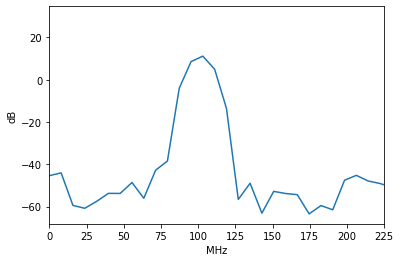

In [53]:
freqs = np.linspace(0,freq,len(dataFFT[0]))/1e6 #MHz
plt.plot(freqs, dataFFT[0]+30)
plt.xlim(0,freq/2e6*.9)
plt.xlabel("MHz")
plt.ylabel("dBm")
plt.show()

In [35]:
print(len(dataFFT[0]))

64
